# PRUEBA DS GASES-HT

## TEORÍA

### SQL


**A. ¿Cuál es la estructura básica de un SELECT?**

*SELECT* : Es una sentencia y tipo de consulta básica muy utilizada para consultar datos de las tablas de nuestra base de datos. 

SELECT incluye las siguientes cláusulas:

- DISTINCT: Operador  para seleccionar filas distintas.

- ORDER BY: Claúsula para ordenar filas.

- WHERE: Claúsula para filtrar filas.

- LIMIT o FETCH: Útiles para seleccionar un subconjunto de filas de una tabla.

- GROUP BY: Se usa para agrupar filas en grupos.

- HAVING: Se usa para filtrar grupos.

- INNER JOIN, LEFT JOIN, FULL OUTER JOIN y CROSS JOIN: Cláusulas para unir tablas.

- UNION, INTERSECT y EXCEPT: Para realizar operaciones de conjunto.

***Síntaxis:***

SELECT select_list FROM table_name;

Ejemplo:




Para ejemplificar como funciona la sentencia SELECT, hemos creado una base de datos PostgreSQL en Railway. Realizaremos las consultas en la consola para consultas SQL de PgAdmin

![alt text](1.png)

Hemos realizado la primera consulta, visualizando la tabla consumo_gases previamente importada a la base de datos.

Con la ayuda de la claúsula **WHERE** podemos filtrar en la tabla y mostrar solo los clientes del departamento MAGDALENA:

![alt text](2.png)

Como los registros fueron mensuales para cada cliente, los id_cliente están repetidos, la claúsula DISTINCT nos ayuda a obtener los clientes únicos:

![alt text](3.png)

La claúsula **ORDER BY** nos ayuda a ordenar filas en la tabla. Identificamos los clientes  del departamento del magdalena con mayor consumo en el mes de marzo ordenados de forma descendiente de la siguiente manera:

![alt text](4.png)

**B. ¿Qué es un JOIN?**

Una operación join es una operación que hace coincidir las filas en una tabla con las filas de otra tabla, de manera tal que las columnas de ambas tablas puedan ser colocadas lado a lado en los resultados de la consulta como si éstos vinieran de una sola tabla. SQL define muchos tipos de operaciones join.

**C. Diferencias entre INNER JOIN y LEFT JOIN.**

Un JOIN es un medio de combinar columnas de una o más tablas, usando valores comunes a cada una de las tablas. El estándar SQL ANSI especifica cinco tipos de JOIN: INNER JOIN, LEFT JOIN, RIGHT JOIN, FULL JOIN e CROSS JOIN.

La cláusula INNER JOIN compara cada línea de tabla A con las líneas de tabla B para encontrar todos los pares de líneas que satisfacen la condición de junción. Si la condición de junción fuera evaluada como TRUE, los valores de la columna de las líneas correspondientes de las tablas A y B serán combinadas en una nueva línea e incluidos en el conjunto de resultados.

LEFT JOIN: Retorna todos los registros de la tabla izquierda y los registros correspondientes de la tabla derecha. Para cada línea de la tabla A, la consulta la compara con todas las líneas de la tabla B. Si un par de líneas hiciera con que la condición de junción sea evaluada como TRUE, los valores de la columna de esas líneas serán combinadas para formar una nueva línea que será incluida en el conjunto de resultados.

Si una línea de la tabla “izquierda” A no tuviera ninguna línea correspondiente de la tabla “derecha” B, la consulta irá combinar los valores de la columna de la línea de la tabla “izquierda” A con NULL para cada valor de la columna de la tabla de la “derecha” B que no satisface la condición de junto (FALSE).

En resumen, la cláusula LEFT JOIN retorna todas las líneas de la tabla “izquierda” A y las líneas correspondientes o valores NULL de la tabla “izquierda” A.

![alt text](5.jpg)

Para mostrar ilustrar su uso, trabajaremos con el siguiente ejemplo, teniendo las siguientes tablas que tienen información en común.

![alt text](77.png)

![alt text](87.png)

![alt text](99.png)

![alt text](199.png)

Ejemplo 1:

Si queremos mostrar el titulo de los libros junto con los nombres de sus autores, los títulos de los libros se encuentran en la tabla libros y los nombres en la tabla autores. Para mostrar esta informacion usamos JOIN en estas dos tablas que tienen como columna en común la columna author_id de la tabla y id de la tabla autores:


![alt text](f.png)

La instruccion SELECT se listan las columnas que se van a mostrar: el id del libro, el titulo del libro, y el nombre y apellido del autor. Con la clausula FROM se especifica la primera tabla que se va unir con JOIN, y con la clausula INNER JOIN, especificamos la segunda tabla que se va a unir. Y este es el resultado:

LEFT JOIN

Para este ejemplo, digamos que queremos mostrar la informacion de cada autro de libro y traductor y también queremos mantener la informacion básica de cada libro (id, titulo, y tipo)

Para obtener todos estos datos debemos juntar tres tablas, libros para informacion de los libros, autores para la informacion de los autores y traductores para la informacion de estos últimos, para esto usamos LEFT JOIN:


![alt text](aa.png)

Para RIGHT JOIN podemos repetir nuestro ejemplo anterior pero esta vez queremos mantener todos los datos de la tabla editores, por lo cual tendremos el mismo query del  ejemplo anterior solo que en este remplazamos LEFT JOIN por RIGHT JOIN

![alt text](bb.png)

## ESTADÍSTICA

**- A. Dar 3 ejemplos de distribuciones estadísticas.**

- ***Distribución binomial:***

Es un modelo de probabilidad discreta que describe el número de éxitos en una secuencia fija de ensayos independientes. El experimento de Bernoulli sólo tiene dos resultados posibles: “éxito” y “fracaso”. Un éxito ocurre con probabilidad $p$, siendo $0<p<1$, Entonces El experimento binomial es un experimento de Bernoulli que se ejecuta n veces, de tal manera que las diferentes ejecuciones se efectúen independientemente unas de las otras y con la misma probabilidad $p$

Las características clave de una distribución binomial son:

- Número fijo de ensayos ($n$): Se refiere al número total de experimentos o intentos.

- Probabilidad de éxito ($p$): La probabilidad de que un ensayo tenga éxito. La probabilidad de fracaso (q) es simplemente $q=1-p$

- Independencia: Cada ensayo es independiente, lo que significa que el resultado de un ensayo no afecta el resultado de otro.

- Variable aleatoria discreta: La variable aleatoria en una distribución binomial representa el número de éxitos en los $n$ ensayos

- Función de probabilidad: 

Si se realiza \(n\) veces un experimento de Bernoulli con probabilidad de éxito \(p\), y si \(X\) denota al número total de éxitos obtenidos, entonces la probabilidad de obtener \(k\) éxitos está dada por la función de probabilidad:


$$f(k) \;=\; P(X=k)  \;=\; {n\choose k} p^k\, (1-p)^{n-k}, \qquad k=0,1,2, \ldots, n$$

donde ${n\choose k}$ representa el coeficiente binomial.


Una característica interesante de esta distribución binomial es que cuando el número de ensayos \(n\) en una distribución binomial es grande, la distribución binomial se aproxima a una distribución normal. Este fenómeno es conocido como la aproximación de la distribución binomial a la distribución normal o la regla de De Moivre-Laplace. La precisión de la aproximación a la distribución normal aumenta a medida que \(n\) se vuelve más grande:

![alt text](6.png)

- ***Distribución normal:***

La distribución normal (en ocasiones llamada distribución gaussiana) es la distribución continua que se utiliza más comúnmente en estadística, es un modelo que aproxima el valor de una variable aleatoria a una situación ideal, dependiendo de la media y la desviación típica. Se caracteriza por su forma de campana simétrica , está completamente determinada por dos parámetros: la media $ \mu $ y la desviación estándar $ \sigma $ y dadas las características de esta distribución, la media, la mediana y la moda coinciden siempre.

La función de densidad de probabilidad (PDF) de la distribución normal está dada por la siguiente fórmula:

$$f(x)\;= \; \frac{1}{\sqrt{2 \pi \sigma^2}} \, e^{-\frac{(x-\mu)^2} {2 \sigma^2}}, \qquad \text{para todo $x$ real}$$

donde:
- $x$ es la variable aleatoria.
- $ \mu $ ,es la media de la distribución, que determina la ubicación del pico de la campana.
- $ \sigma $ , es la desviación estándar, que controla la dispersión de la distribución.

Una característica clave de la distribución normal es:

*Teorema del límite central:* La distribución normal es fundamental en el teorema del límite central, que establece que si una muestra es lo bastante grande (generalmente cuando el tamaño muestral (n) supera los 30), sea cual sea la distribución de la media muestral, seguirá aproximadamente una distribución normal.

- ***Distribución chi cuadrado:***

La distribución chi-cuadrada es una distribución continua que se define por dos parámetros: los grados de libertad y el parámetro de no centralidad. Esta distribución exhibe asimetría positiva, pero dicha asimetría tiende a disminuir a medida que aumentan los grados de libertad.

En el contexto de pruebas de significancia estadística, la distribución chi-cuadrada $ \chi^2 $ se utiliza para dos propósitos principales:

- Prueba de bondad de ajuste: Esta prueba se emplea para evaluar cuán bien se ajusta una muestra a una distribución teórica. Por ejemplo, mediante una prueba de bondad de ajuste de chi-cuadrada, se puede determinar si los datos de una muestra concuerdan con una distribución específica, como la distribución de Poisson.

- Prueba de independencia: La distribución chi-cuadrada también se aplica para verificar la independencia entre variables categóricas. En este caso, se analiza si las frecuencias observadas en diferentes categorías difieren significativamente de las esperadas bajo la hipótesis de independencia.

- Relación con la Distribución Normal: Cuando los grados de libertad son lo suficientemente grandes, la distribución chi-cuadrada se aproxima a una distribución normal. Esto está relacionado con el teorema del límite central.

Su función de densidad de probabilidad es: 

$ f(x;k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{(k/2)-1} e^{-x/2} $

donde:
- $ x $ es la variable aleatoria.
- $ k $ son los grados de libertad.
- $ \Gamma( \cdot ) $ es la función gamma.

**B. Defina media, mediana y moda.**

Son medidas de tendencia central  que se utilizan para  identificar cuáles son las tendencias en un conjunto de datos  o hacia dónde se inclina o agrupa más la información. 

 ***Media:*** Es el valor promedio del grupo datos, es decir, la cifra que se obtiene al sumar todos los datos y dividir el resultado entre la cantidad de los mismos. Es sensible a valores extremos, ya que un solo valor atípico puede afectar significativamente su valor. 

***Mediana:*** Es el valor que ocupa la posición central en un conjunto de datos ordenados de menor a mayor (o viceversa).

* Si el número de observaciones es impar, la mediana es simplemente el valor en el centro.

* Si el número de observaciones es par, la mediana es la media de los dos valores centrales.

* La mediana es menos sensible a valores extremos que la media, ya que solo depende de la posición central de los datos.

 ***Moda:*** Es el valor que aparece con mayor frecuencia en un conjunto de datos. Un conjunto de datos puede tener una moda (unimodal), más de una moda (multimodal) o puede no tener ninguna moda si todos los valores son diferentes. A diferencia de la media y la mediana, la moda no tiene en cuenta la magnitud de los valores, solo se centra en cuáles son los más frecuentes.

**C. ¿Cómo identificar datos atípicos?**

Los datos atípicos son observaciones que difieren significativamente de las demás dentro de un conjunto de datos. Los valores atípicos pueden surgir debido a:

a) Errores en el proceso de recopilación de datos.

b) Eventos excepcionales o inusuales.

c) Valores extremos

d) Causas desconocidas.

Es crucial comparar siempre una observación con otras observaciones del mismo fenómeno antes de etiquetarla como atípica.
La presencia de datos atípicos puede distorsionar los resultados del análisis, por lo que es importante identificarlos y manejarlos adecuadamente, a menudo excluyéndolos del análisis.

Técnicas:

***Estadísticas descriptivas***: Es un primer paso para identificar posibles datos atípicos en una muestra, esto incluye:

- Gráficos de histogramas

- Máximos y mínimos

- Boxplot, también conocido como diagrama de caja y bigotes, el cual nos proporciona una rápida visualización de la distribución de un conjunto de datos. Este gráfico se utiliza para mostrar la dispersión y la forma general de la distribución, así como para identificar posibles valores atípicos.

- Percentiles: Con el método de los percentiles, todas las observaciones que se encuentren fuera del intervalo formado por los percentiles 2 se considerarán como posibles valores atípicos.

***Detección basada en densidad (DBSCAN)***: Es un algoritmo de clustering que agrupa puntos densos y considera los puntos menos densos como outliers.

***Algoritmos de aprendizaje no supervisado***: Métodos como K-Means pueden ayudar a identificar grupos de datos, y los puntos que no se ajustan bien a ningún grupo pueden considerarse atípicos.

***Filtro de Hampel***: Considera como valores atípicos los valores fuera del intervalo formado por la mediana, más o menos 3 desviaciones absolutas de la mediana. 

***Prueba de Grubbs***: También conocido como el test de residuo normalizado máximo o el test de desviación estandarizada extrema, es una prueba utilizada para detectar valores atípicos en un conjunto de datos univariado asumido que proviene de una población distribuida normalmente.

$H_0$: El valor más alto/bajo no es un valor atípico

$H_1$: El valor más alto/bajo es un valor atípico
 
***Prueba de Dixon***: Es otra herramienta estadística que se emplea para identificar si un solo valor, ya sea alto o bajo, es un posible valor atípico en un conjunto de datos. Al igual que la prueba de Grubbs, se centra en la detección de valores atípicos de manera individual. Es más útil para muestras de pequeño tamaño $(n \leq 25)$.

***Prueba de Rosner***: La prueba de Roesner es una prueba de hipótesis de dos lados e identifica outliers por encima o por debajo de la media. A diferencia de las pruebas de Grubbs y Dixon, que requieren iteraciones para detectar múltiples valores atípicos. Esta prueba está diseñada para superar el problema del enmascaramiento, donde un valor atípico cercano a otro puede pasar desapercibido. Es importante destacar que la prueba de Rosner es más adecuada para muestras grandes ($n \geq 20$) en comparación con la prueba de Dixon.

**D. ¿De qué forma trataría con datos faltantes?**

- Eliminación: 
Ventaja: Simple y rápido.
Desventaja: Puede resultar en pérdida de información si hay muchos datos faltantes.

- Imputacion: Para evitar una pérdida significativa de datos lo mejor es usar la imputación. Idealmente esta imputación no debería cambiar la distribución de nuestros datos. Así que si originalmente teníamos una distribución normal (con forma de campana), entonces después de la imputación se debería mantener esta distribución original.

*Imputación por emparejamiento predictivo medio*: Consiste en sustituir el valor ausente por la Media de los valores válidos. La media se utiliza a menudo para imputar datos no categóricos. El fundamento teórico de utilizar la media para imputar los datos faltantes es que la media es una buena estimación para seleccionar aleatoriamente una observación de una distribución normal. Cuando los datos no siguen una distribución normal es común hacer sustitución por la mediana.

*Árboles de clasificación y regresión (CART):* Es un enfoque que implica utilizar árboles de decisión para predecir y rellenar los valores faltantes en un conjunto de datos. Los árboles CART se pueden utilizar tanto para variables categóricas (clasificación) como para variables numéricas (regresión).

*Random Forest*: La imputación de datos faltantes con Random Forest implica utilizar un conjunto de árboles de decisión, conocido como Random Forest, para predecir y rellenar los valores ausentes en un conjunto de datos. Random Forest es una técnica de aprendizaje conjunto que construye múltiples árboles de decisión y combina sus predicciones.

*Regresión lineal usando BOOSTRAP*: La imputación por regresión produce estimaciones que no son sesgadas de las medias bajo MCAR además esta imputación de regresión fortalece por simulación las relaciones en los datos.

*Imputación de regresión estocástica*: A diferencia de la imputación determinista, donde se genera un único valor para cada dato faltante, la imputación de regresión estocástica incorpora incertidumbre al generar múltiples valores posibles.

*imputación de regresión estocástica Bayesiana*: La imputación de regresión estocástica bayesiana es un enfoque que utiliza modelos bayesianos para imputar valores faltantes en un conjunto de datos.

*Imputación Cold Deck*: Este enfoque implica utilizar datos históricos o previos con características similares a los datos faltantes para estimar o imputar los valores ausentes. La efectividad de este método depende de la calidad y relevancia de la información histórica disponible.

*Imputación Hot Deck*: Este enfoque implica utilizar datos históricos o previos con características similares a los datos faltantes para estimar o imputar los valores ausentes. La efectividad de este método depende de la calidad y relevancia de la información histórica disponible.

*Interpolación*: Se estiman los valores perdidos interpolando (uniendo de manera lineal, polinomial, etc.) el último valor válido antes del valor perdido y el primer valor válido después del valor perdido. Suele usarse en series de tiempo.


## Análisis exploratorio de los datos (EDA)

- Importamos las librerías necesarias:

In [432]:
import os
import pandas as pd
import torch
import torchaudio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import altair as alt
import plotly.graph_objs as go
import re
import calendar
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Realizamos la importación de los datos:

In [433]:
DATOS=pd.read_csv('data.csv')
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO
0,1/1/2021,1068535,ATLANTICO,RESIDENCIAL,0,REAL
1,1/1/2021,1095302,ATLANTICO,COMERCIAL,21,REAL
2,1/1/2021,1131454,ATLANTICO,RESIDENCIAL,0,REAL
3,1/1/2021,1134487,ATLANTICO,COMERCIAL,132,REAL
4,1/1/2021,1140821,ATLANTICO,RESIDENCIAL,0,REAL


### Verificación de datos faltantes

Vemos que los datos no tienen registros faltantes:

In [434]:
datos_faltantes=DATOS.isnull().sum()
datos_faltantes

PERIODO          0
ID CLIENTE       0
DEPARTAMENTO     0
CLASIFICACION    0
CONSUMO          0
TIPO CONSUMO     0
dtype: int64

In [435]:
DATOS.shape

(312, 6)

La data está conformada por 312 registros y 6 columnas, cuyos nombres son:

In [436]:
DATOS.columns

Index(['PERIODO', 'ID CLIENTE', 'DEPARTAMENTO', 'CLASIFICACION', 'CONSUMO',
       'TIPO CONSUMO'],
      dtype='object')

### Variables

En los datos se tienen 6 variables: 

- Periodo: las fechas de registro de consumo mensual. 

- ID cliente: Código de identificación del cliente.

- Departamento: Territorio nacional donde se encuentra ubicado el cliente.

- Clasificación: Etiqueta asignada para categorizar al cliente según el tipo de cliente o el uso que se le da al consumo registrado.

- Consumo: Registro del consumo mensual de cada cliente.

- Tipo de consumo: Esta variable nos indica si el registro de consumo de los clientes fue real o estimado 


#### Análisis descriptivo univariado

Los datos corresponde al registro del consumo mensual de una lista de clientes, identificados con un código o ID diferente. Se realizó un filtro para identificar cuántos clientes se encuentran en la muestra obteniéndose:

In [437]:
DATOS['ID CLIENTE'].unique()

array([ 1068535,  1095302,  1131454,  1134487,  1140821,  1999658,
        2058257,  2076530,  2084470,  6089526,  6111795,  8091803,
        8092746, 17067567, 17186468, 50002330, 50043502, 50071540,
       50095570, 50157457, 50599279, 50689487, 51030818, 51390294,
       51577033, 51639236], dtype=int64)

In [438]:
len(DATOS['ID CLIENTE'].unique())

26

En total son 26 clientes, a los cuales se les hizo un registro mensual de su consumo. A continuación se realizará un análisis descriptivo de los clientes:

In [439]:
datos=DATOS[['ID CLIENTE', 'DEPARTAMENTO','CLASIFICACION']].drop_duplicates()
datos.head()

,ID CLIENTE,DEPARTAMENTO,CLASIFICACION
0,1068535,ATLANTICO,RESIDENCIAL
1,1095302,ATLANTICO,COMERCIAL
2,1131454,ATLANTICO,RESIDENCIAL
3,1134487,ATLANTICO,COMERCIAL
4,1140821,ATLANTICO,RESIDENCIAL


#### Departamento

In [440]:
pd.DataFrame(datos['DEPARTAMENTO'].describe(include=object)).T

,count,unique,top,freq
DEPARTAMENTO,26,2,ATLANTICO,19


Podemos ver que la variable ***Departamento*** es categórica  y tiene dos niveles, uno  es **Atlantico** el cual tiene mayor frecuencia, representando aproximadamente el 73% de los clientes registrados. A continuación un diagrama de barras: 

In [441]:
fig=px.bar(datos['DEPARTAMENTO'].value_counts().sort_index(),
           x=datos['DEPARTAMENTO'].value_counts().index,
           y=datos['DEPARTAMENTO'].value_counts().values,
           labels={'x':'Departamento', 'y':'Frecuencia'},
           title='Departamento: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Departamento',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600)
fig.show()

Hay 7 registros de la categoría ***Magdalena*** en los datos, representando un 26,9%. Vemos que de los 26 clientes, gran parte son del departamento del Atlántico.

#### Clasificación

In [442]:
pd.DataFrame(datos['CLASIFICACION'].describe(include=object)).T

,count,unique,top,freq
CLASIFICACION,26,3,RESIDENCIAL,15


La variable ***Clasificacion*** tiene 3 niveles o categorías, siendo la categoría **Residencial** la más frecuente; se tiene en total 15 clientes con esta categoría, representando un 57,6% del total.

In [443]:
fig=px.bar(datos['CLASIFICACION'].value_counts().sort_index(),
           x=datos['CLASIFICACION'].value_counts().index,
           y=datos['CLASIFICACION'].value_counts().values,
           labels={'x':'Clasificación', 'y':'Frecuencia'},
           title='Clasificación: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Clasificación',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600).show()

El diagrama de barras anterior nos muestra la frecuencia de cada categoría en la variable ***Clasificacion***. La segunda categoría es **Comercial** con 6 registros, mientras que la categoría **Industrial** cuenta con 5 registros. Vemos que los clientes se encuentran categorizados, y la mayoría de estos son parte del sector residencial.

#### Tipo de consumo

In [444]:
DATOS['TIPO CONSUMO'].unique()

array(['REAL', 'ESTIMADO'], dtype=object)

La variable ***Tipo consumo*** también es categórica, con dos categorías: 

- REAL

- ESTIMADO

- Tipo de consumo en el año:

Los datos entregan información sobre el tipo de consumo mensual en cada cliente durante el año 2021:

In [445]:
fig=px.bar(DATOS['TIPO CONSUMO'].value_counts().sort_index(),
           x=DATOS['TIPO CONSUMO'].value_counts().index,
           y=DATOS['TIPO CONSUMO'].value_counts().values,
           labels={'x':'Tipo de consumo', 'y':'Frecuencia'},
           title='Tipo de consumo: Frecuencia',
           color_discrete_sequence=['#17becf']).update_layout(xaxis_title='Tipo de consumo',
                                            yaxis_title='Frecuencia',
                                            xaxis=dict(categoryorder='total descending'),
                                            height=500, width=600).show()

El diagrama de barras anterior nos muestra que la categoría **Real** es la que más registros tuvo en la muestra. **Estimado** es la segunda categoría de esta variable, con una pequeña proporción de registros, menos del 3%. Gran parte de los clientes en la muestra contaron con un registro de consumo "real" durante el año 2021
.

- Tipo de consumo por periodo

In [446]:
DATOS['PERIODO'] = pd.to_datetime(DATOS['PERIODO'])
DATOS['MES'] = DATOS['PERIODO'].dt.strftime('%B')
meses_ord= ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
Tipo_consumo=DATOS[['MES','TIPO CONSUMO']]
Tipo_consumo['MES'] = pd.Categorical(Tipo_consumo['MES'], categories=meses_ord, ordered=True)
Tipo_consumo=Tipo_consumo.groupby(['MES','TIPO CONSUMO']).size().reset_index(name='count')
Tipo_consumo.head()

,MES,TIPO CONSUMO,count
0,January,ESTIMADO,0
1,January,REAL,26
2,February,ESTIMADO,0
3,February,REAL,26
4,March,ESTIMADO,0


In [447]:
fig=px.bar(Tipo_consumo, x='MES', y='count', color='TIPO CONSUMO',
           labels={'count':'Frecuencia','TIPO CONSUMO':'Tipo de consumo','MES':'Meses'},
           title='Tipo de consumo por mes: Frecuencia',
           color_discrete_sequence=px.colors.qualitative.Set2).update_layout(yaxis=dict(dtick=5),barmode='group', 
                                                              height=500,
                                                              width=600).show()

El diagrama de barras anterior nos muestra que los primeros tres meses del año , mayo y diciembre, los 26 clientes registraron un tipo de consumo **real**, mientras que hubo meses donde algunos clientes tuvieron un tipo de consumo **estimado** (*En verde*)

#### Consumo

- Consumo anual en la muestra:

El siguiente resumen corresponde a un análisis descriptivo de la variable numérica consumo:

In [448]:
pd.DataFrame(DATOS['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,312.0,1226.971154,3234.101606,-75.0,11.0,20.0,353.75,23748.0


- El registro de consumo promedio en el año 2021 fue de 1226,97 con una desviación estándar de 3234.10; esta desviación nos indica una gran variabilidad en los datos.

- El valor mínimo de consumo registrado es -75, este dato al ser negativo es candidato a ser un dato atípico, ya que la variable consumo debería ser positiva.

- El valor máximo registrado fue 23.748 el cual es bastante elevado comparado con los otros registros, esto teniendo en cuenta que un 75% de los registros es inferior a 353.75. Se validará si es un posible dato atípico. 

- El 50% del consumo anual fue menor o igual a 20. Dado que la mediana de los datos es muy inferior a la media, es decir, la distribución de los datos está sesgada hacia la derecha, como puede verse en el siguiente gráfico:


In [449]:
fig=px.histogram(DATOS, x='CONSUMO', nbins=30, title='Consumo: Histograma', 
                 labels={"value":"Consumo", "count":"Frecuencia"}, color_discrete_sequence=['#17becf']).update_layout(height=400,width=500).show()

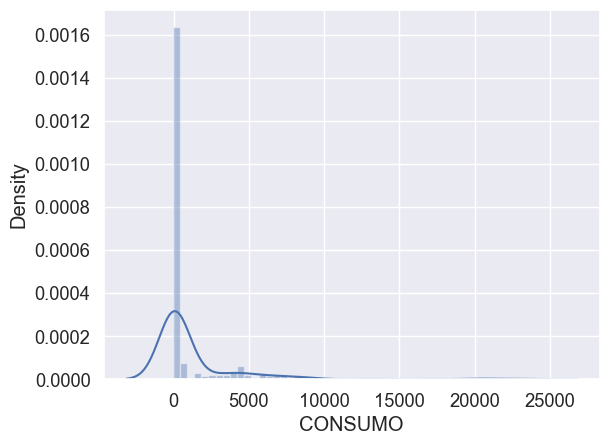

In [450]:
sns.distplot(DATOS.CONSUMO);

El gráfico anterior nos muestra como la gran parte de los datos se acumulan a la izquierda.

- Consumo mensual por cliente

In [451]:
DATOS['MES_NUM'] = DATOS['PERIODO'].dt.month
DATOS=pd.DataFrame(DATOS)
DATOS.head()

,PERIODO,ID CLIENTE,DEPARTAMENTO,CLASIFICACION,CONSUMO,TIPO CONSUMO,MES,MES_NUM
0,2021-01-01,1068535,ATLANTICO,RESIDENCIAL,0,REAL,January,1
1,2021-01-01,1095302,ATLANTICO,COMERCIAL,21,REAL,January,1
2,2021-01-01,1131454,ATLANTICO,RESIDENCIAL,0,REAL,January,1
3,2021-01-01,1134487,ATLANTICO,COMERCIAL,132,REAL,January,1
4,2021-01-01,1140821,ATLANTICO,RESIDENCIAL,0,REAL,January,1


- Consumo por clasificación

***Residencial***

In [452]:
consumo_residencial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='RESIDENCIAL']
pd.DataFrame(consumo_residencial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,180.0,12.094444,7.5485,0.0,9.0,13.0,18.0,32.0


Los clientes del sector residencial tienen un consumo anual promedio de 12,09 con una desviación estándar de 7.54. El siguiente gráfico es un diagrama de cajas donde podemos visualizar los quintiles, se observa la presencia de un posible dato atípico

In [453]:
fig = px.box(consumo_residencial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

***Industrial***

In [454]:
consumo_industrial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='INDUSTRIAL']
pd.DataFrame(consumo_industrial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,60.0,6128.466667,4982.196485,78.0,3522.25,4597.0,7042.0,23748.0


Los clientes del sector industrial tiene un consumo promedio anual de 6128.46 con una desviación de 4982.19. El consumo mínimo registrado fue de 78, mientras que el consumo máximo registrado fue de 23748. El siguiente boxplot nos muestra posibles datos atípicos.

In [455]:
fig = px.box(consumo_industrial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

***Comercial***

In [456]:
consumo_comercial=DATOS[['CONSUMO','CLASIFICACION','MES_NUM','MES']][DATOS['CLASIFICACION']=='COMERCIAL']
pd.DataFrame(consumo_comercial['CONSUMO'].describe()).T

,count,mean,std,min,25%,50%,75%,max
CONSUMO,72.0,179.583333,176.869392,-75.0,33.5,112.0,360.5,582.0


Los clientes del sector comercial tiene un consumo promedio anual de 179.58 con una desviación de 176.86 . se identifica un registro negativo que probablemente sea un dato atípico, ya que el consumo no puede ser negativo

In [457]:
fig = px.box(consumo_comercial, x='CONSUMO', y='CLASIFICACION', 
             color_discrete_sequence=['#17becf']).update_layout(height=400, width=600).show()

- Consumo por mes según tipo de clasificación

***Residencial: Consumo Mensual***

In [458]:
fig = px.box(consumo_residencial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Residencial: Consumo Mensual',
                                                                                height=400, width=600).show()

El boxplot anterior nos muestra el consumo por mes para los clientes del sector residencial. En los meses de Abril y Mayo se registran dos posibles datos atípicos. vemos algunos registros por encima de 25 en los meses de Enero, Febrero, Marzo y Abril. En general, los registros promedios mensuales estuvieron entre 10 a 15. 

***Industrial: Consumo mensual***

En el caso de los clientes del sector industrial hay variabilidad en los reportes mensuales de consumo. El mes de junio es donde se registra el menor consumo, con un registro máximo de 4537. El mes de Marzo registra un aumento significativo en el consumo, el 50% de los clientes registraron un consumo superior a 8519, con un registro máximo de hasta 23748. Se registran posibles datos atípicos en los meses de enero , junio y diciembre.

A partir del mes de marzo y hasta el mes de junio se observa una tendencia a disminuir en el consumo de los clientes del sector industrial, luego este consumo aumenta levemente hasta los meses de octubre.

In [459]:
fig = px.box(consumo_industrial, x='MES', y='CONSUMO', color='MES').update_layout(showlegend=False,
                                                                                  title='Industrial: Consumo Mensual',
                                                                                  height=400, width=600).show()

***Comercial: Consumo mensual***

Para el caso de los clientes en el sector comercial, no se observa mucha variabilidad de mes a mes. el 50% de los clientes tuvieron un consumo superiro a 81.5 mensualmente. Algunos con registros máximos de hasta 582. En el mes de noviembre se observa un registro mínimo de -75, es probable que haya habido un equivocación al ingresar esta información. 

In [460]:
fig = px.box(consumo_comercial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Comercial: Consumo Mensual',
                                                                                height=400, width=600).show()

## Clientes con registro faltante

Se consideró la imputación de registros ya que sin información del consumo para estos clientes no es posible predecir el consumo: 

In [461]:
DATOS[['CONSUMO','MES','ID CLIENTE', 'TIPO CONSUMO', 'CLASIFICACION','DEPARTAMENTO']][DATOS['CONSUMO']==0].groupby(['ID CLIENTE',
                                                                                                                    'MES','TIPO CONSUMO', 'DEPARTAMENTO','CLASIFICACION'])['CONSUMO'].sum().reset_index()

,ID CLIENTE,MES,TIPO CONSUMO,DEPARTAMENTO,CLASIFICACION,CONSUMO
0,1068535,April,ESTIMADO,ATLANTICO,RESIDENCIAL,0
1,1068535,August,REAL,ATLANTICO,RESIDENCIAL,0
2,1068535,December,REAL,ATLANTICO,RESIDENCIAL,0
3,1068535,February,REAL,ATLANTICO,RESIDENCIAL,0
4,1068535,January,REAL,ATLANTICO,RESIDENCIAL,0
5,1068535,July,REAL,ATLANTICO,RESIDENCIAL,0
6,1068535,June,REAL,ATLANTICO,RESIDENCIAL,0
7,1068535,March,REAL,ATLANTICO,RESIDENCIAL,0
8,1068535,May,REAL,ATLANTICO,RESIDENCIAL,0
9,1068535,November,REAL,ATLANTICO,RESIDENCIAL,0


Vemos que tres clientes con ID (1068535,1131454,1140821	) no reportaron registros de consumo en todo el año. Probablemente ya estos clientes no están activos o simplemente no se les hizo lectura de consumo. Dado que no se conoce la situación actual de estos clientes, se optará por imputar sus datos faltantes. Para la imputación emplearemos el hecho de que estos clientes están categorizados.

- Cliente con ID 1068535:

Pertenece al departamento del Atlántico , con el 90% de registro REAL y tipo de clasificación RESIDENCIAL. 

In [462]:
fig = px.box(consumo_residencial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Residencial: Consumo Mensual',
                                                                                height=400, width=600).show()

Observando el consumo mensual para los clientes clasificados como residenciales, se observa que mes a mes mantienen una mediana entre 10 a 15 de consumo. Se hará la imputación del cliente mes a mes con la mediana muestral reportada en el gráfico anterior. Esto debido a que se observan sesgos en los registros mensuales, por lo que es posible que no sigan una distribución normal, por tanto una imputación con la media no sería apropiado. 

- Cálculo de las medianas:

In [463]:
mediana_res=consumo_residencial[['MES_NUM','CONSUMO']].groupby(['MES_NUM']).median()
mediana_res.head()

,CONSUMO
MES_NUM,
1,11.0
2,12.0
3,11.0
4,15.0
5,13.0


In [464]:
DATOS=DATOS[['CONSUMO','DEPARTAMENTO','CLASIFICACION','TIPO CONSUMO','MES_NUM', 'ID CLIENTE']]
DATOS.reset_index()
DATOS.head()

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
0,0,ATLANTICO,RESIDENCIAL,REAL,1,1068535
1,21,ATLANTICO,COMERCIAL,REAL,1,1095302
2,0,ATLANTICO,RESIDENCIAL,REAL,1,1131454
3,132,ATLANTICO,COMERCIAL,REAL,1,1134487
4,0,ATLANTICO,RESIDENCIAL,REAL,1,1140821


- Imputación

In [465]:
DATOS.loc[(DATOS['ID CLIENTE'] == 1140821) & (DATOS['CONSUMO'] == 0),'CONSUMO']=mediana_res['CONSUMO'].values
DATOS.loc[(DATOS['ID CLIENTE'] == 1140821)]

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
4,11,ATLANTICO,RESIDENCIAL,REAL,1,1140821
30,12,ATLANTICO,RESIDENCIAL,REAL,2,1140821
56,11,ATLANTICO,RESIDENCIAL,REAL,3,1140821
82,15,ATLANTICO,RESIDENCIAL,REAL,4,1140821
108,13,ATLANTICO,RESIDENCIAL,REAL,5,1140821
134,11,ATLANTICO,RESIDENCIAL,REAL,6,1140821
160,11,ATLANTICO,RESIDENCIAL,REAL,7,1140821
186,14,ATLANTICO,RESIDENCIAL,REAL,8,1140821
212,13,ATLANTICO,RESIDENCIAL,REAL,9,1140821
238,12,ATLANTICO,RESIDENCIAL,REAL,10,1140821


In [466]:
DATOS.loc[(DATOS['ID CLIENTE'] == 1131454) & (DATOS['CONSUMO'] == 0),'CONSUMO']=mediana_res['CONSUMO'].values
DATOS.loc[(DATOS['ID CLIENTE'] == 1131454)]

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
2,11,ATLANTICO,RESIDENCIAL,REAL,1,1131454
28,12,ATLANTICO,RESIDENCIAL,REAL,2,1131454
54,11,ATLANTICO,RESIDENCIAL,REAL,3,1131454
80,15,ATLANTICO,RESIDENCIAL,REAL,4,1131454
106,13,ATLANTICO,RESIDENCIAL,REAL,5,1131454
132,11,ATLANTICO,RESIDENCIAL,REAL,6,1131454
158,11,ATLANTICO,RESIDENCIAL,REAL,7,1131454
184,14,ATLANTICO,RESIDENCIAL,REAL,8,1131454
210,13,ATLANTICO,RESIDENCIAL,REAL,9,1131454
236,12,ATLANTICO,RESIDENCIAL,REAL,10,1131454


In [467]:
DATOS.loc[(DATOS['ID CLIENTE'] == 1068535) & (DATOS['CONSUMO'] == 0),'CONSUMO']=mediana_res['CONSUMO'].values
DATOS.loc[(DATOS['ID CLIENTE'] == 1068535)]


,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
0,11,ATLANTICO,RESIDENCIAL,REAL,1,1068535
26,12,ATLANTICO,RESIDENCIAL,REAL,2,1068535
52,11,ATLANTICO,RESIDENCIAL,REAL,3,1068535
78,15,ATLANTICO,RESIDENCIAL,ESTIMADO,4,1068535
104,13,ATLANTICO,RESIDENCIAL,REAL,5,1068535
130,11,ATLANTICO,RESIDENCIAL,REAL,6,1068535
156,11,ATLANTICO,RESIDENCIAL,REAL,7,1068535
182,14,ATLANTICO,RESIDENCIAL,REAL,8,1068535
208,13,ATLANTICO,RESIDENCIAL,REAL,9,1068535
234,12,ATLANTICO,RESIDENCIAL,REAL,10,1068535


Vemos que se ha imputado en los clientes sin registros de consumo la correspondiente mediana mensual en la columna 'CONSUMO'

- Tratamiento de dato atípico:

Recordemos que hay un registro de consumo negativo en el mes de noviembre para los clientes con clasificación comercial:

In [468]:
fig = px.box(consumo_comercial, x='MES', y='CONSUMO',color='MES').update_layout(showlegend=False,
                                                                                title='Comercial: Consumo Mensual',
                                                                                height=400, width=600).show()

Dado que ese registro es para un cliente en específico, observemos su registro mensual :

In [469]:
DATOS.loc[(DATOS['CONSUMO'] < 0)]

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
277,-75,ATLANTICO,COMERCIAL,REAL,11,50071540


Observemos la serie temporal de consumo para este cliente:

In [470]:
cliente_50071540=DATOS.loc[(DATOS['ID CLIENTE'] == 50071540)]
cliente_50071540

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
17,52,ATLANTICO,COMERCIAL,REAL,1,50071540
43,45,ATLANTICO,COMERCIAL,REAL,2,50071540
69,48,ATLANTICO,COMERCIAL,REAL,3,50071540
95,26,ATLANTICO,COMERCIAL,REAL,4,50071540
121,28,ATLANTICO,COMERCIAL,REAL,5,50071540
147,40,ATLANTICO,COMERCIAL,ESTIMADO,6,50071540
173,30,ATLANTICO,COMERCIAL,REAL,7,50071540
199,36,ATLANTICO,COMERCIAL,ESTIMADO,8,50071540
225,34,ATLANTICO,COMERCIAL,ESTIMADO,9,50071540
251,31,ATLANTICO,COMERCIAL,ESTIMADO,10,50071540


Se observan dos datos atípicos , correspondientes a los meses de noviembre y diciembre. Dado que el consumo es un registro mensual, se hará interpolación como técnica de tratamiento de estos datos atípicos

In [471]:
fig = px.box(cliente_50071540,  x='CONSUMO').update_layout(showlegend=False,title='cliente_50071540: Consumo Mensual',
                                                                                height=400, width=600,).show()

- Interpolación:

Cambiamos los datos atípicos por NA e interpolamos:

In [472]:
DATOS.loc[(DATOS['ID CLIENTE'] == 50071540 ) & (DATOS['CONSUMO'] <= 0), 'CONSUMO']=np.nan
DATOS.loc[(DATOS['ID CLIENTE'] == 50071540 )].tail()

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
199,36.0,ATLANTICO,COMERCIAL,ESTIMADO,8,50071540
225,34.0,ATLANTICO,COMERCIAL,ESTIMADO,9,50071540
251,31.0,ATLANTICO,COMERCIAL,ESTIMADO,10,50071540
277,NaN,ATLANTICO,COMERCIAL,REAL,11,50071540
303,NaN,ATLANTICO,COMERCIAL,REAL,12,50071540


Se usó interpolación no lineal, de orden 3, obteniéndose:

In [473]:
cliente_50071540['CONSUMO'][(cliente_50071540['CONSUMO'] <= 0)]=np.nan
cliente_50071540['CONSUMO'].interpolate(method='spline', order=3, inplace=True)


Puede verse que ya el boxplot no encuentra datos atípicos en el cliente:

In [474]:
fig = px.box(cliente_50071540,  x='CONSUMO').update_layout(showlegend=False,title='cliente_50071540: Consumo Mensual',
                                                                                height=400, width=600,).show()

In [475]:
DATOS.loc[DATOS['ID CLIENTE'] == 50071540, 'CONSUMO'] = cliente_50071540['CONSUMO']
DATOS[(DATOS['ID CLIENTE'] == 50071540 )]

,CONSUMO,DEPARTAMENTO,CLASIFICACION,TIPO CONSUMO,MES_NUM,ID CLIENTE
17,52.000000,ATLANTICO,COMERCIAL,REAL,1,50071540
43,45.000000,ATLANTICO,COMERCIAL,REAL,2,50071540
69,48.000000,ATLANTICO,COMERCIAL,REAL,3,50071540
95,26.000000,ATLANTICO,COMERCIAL,REAL,4,50071540
121,28.000000,ATLANTICO,COMERCIAL,REAL,5,50071540
147,40.000000,ATLANTICO,COMERCIAL,ESTIMADO,6,50071540
173,30.000000,ATLANTICO,COMERCIAL,REAL,7,50071540
199,36.000000,ATLANTICO,COMERCIAL,ESTIMADO,8,50071540
225,34.000000,ATLANTICO,COMERCIAL,ESTIMADO,9,50071540
251,31.000000,ATLANTICO,COMERCIAL,ESTIMADO,10,50071540


## TENDENCIAS 

- Consumo por mes

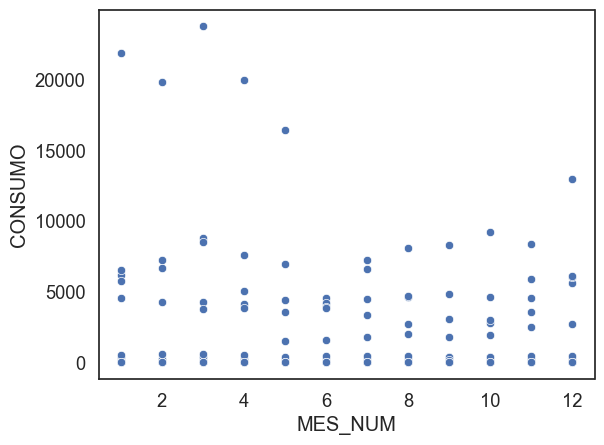

In [476]:
sns.set_style("white")
ax1 = sns.scatterplot(x="MES_NUM", y="CONSUMO", data=DATOS)

El siguiente gráfico representa el consumo medio mensual, y la línea sombreada representa el intervalo de confianza que por defecto es del 95%.

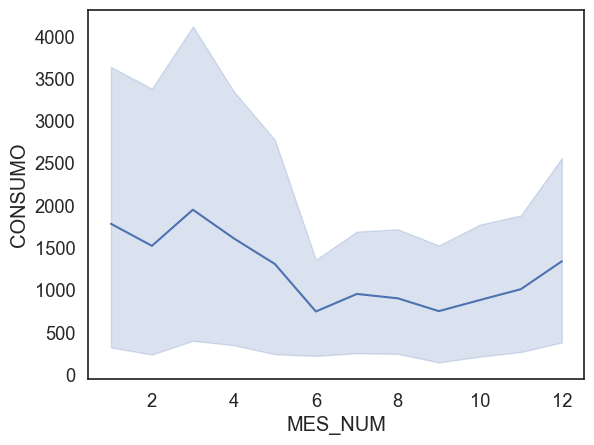

In [477]:
ax = sns.lineplot(x="MES_NUM", y="CONSUMO", data=DATOS)

Se observa una tendencia a disminuir el consumo desde el mes de marzo (3) al mes de junio (6), luego el consumo tiende a aumentar. 

## MODELO

Se propone primeramente un modelo de regresión, donde se considerarán como variables independientes:

- MES (numérica)
- CLASIFICACIÓN (categórica)
- DEPARTAMENTO (categórica)
- TIPO CONSUMO (categórica)

y como variable dependiente:

- CONSUMO (numérica continua)

### 1. Modelo de regresión Ridge:

- Ventaja con respecto a la regresión lineal simple:

En la regresión ridge, los coeficientes se eligen no sólo para que predigan bien en los datos de entrenamiento, sino que también, para que se ajusten a una restricción adicional. La regresión Ridge regulariza la regresión lineal imponiendo una penalización al tamaño de los coeficientes.
La magnitud de los coeficientes se considera lo más pequeña posible; en otras palabras, todas las entradas  deben ser cercanas a cero. Intuitivamente, esto significa que cada característica debe tener el menor efecto posible sobre el resultado (lo que se traduce en tener una pendiente pequeña), sin dejar de predecir bien. Esta restricción es un ejemplo de lo que se llama regularización. La regularización consiste en restringir explícitamente un modelo para evitar el overfitting. 

Se consideró este modelo ya que se tomaron todas las variables independientes y se quiere que aquellas que no tienen un efecto significativo sobre la variable respuesta tengan coeficientes los más pequeños posibles, dando importancia a las variables que tienen un mayor efecto a la hora de predecir la variable respuesta.

 Por otro lado, para evitar problemas de sobreajuste, dado que contamos con un tamaño de muestra pequeño. 



- Correlación entre variables numéricas:

El valor de -0.083 evidencia una correlación negativa débil entre las variables. 

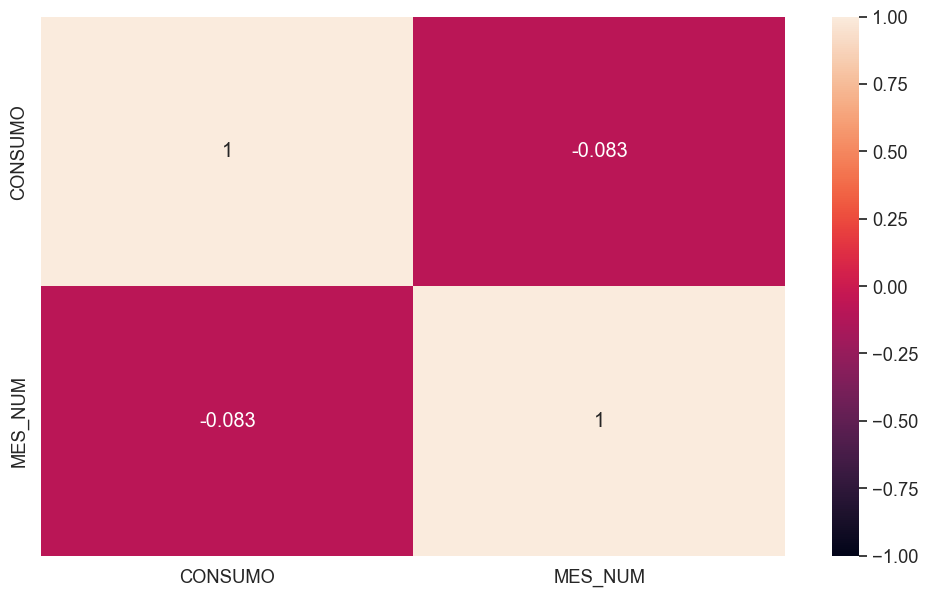

In [478]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 7))
sns.heatmap(DATOS.drop(['DEPARTAMENTO', 'CLASIFICACION', 'TIPO CONSUMO','ID CLIENTE'],axis=1).corr(), annot = True, vmin = -1, vmax = 1);

Pasamos las variables categóricas a variables dummies. Se eliminará una de las categorías para evitar "Dummy variable trap".

- Dummy variable trap: La trampa de la variable dummy es un escenario en el que hay atributos que están muy correlacionados (multicolineales) y una variable predice el valor de otras. Cuando utilizamos la codificación de una sola variable para tratar los datos categóricos, una variable dummy (atributo) puede predecirse con la ayuda de otras variables dummy. La utilización de todas las variables dummies en modelos de ML conduce a una trampa de variables dummy. Por lo tanto, los modelos de ML deben diseñarse para excluir una variable dummy.

In [479]:
cat_columns = ['DEPARTAMENTO', 'CLASIFICACION', 'TIPO CONSUMO'];
DATOS = pd.get_dummies(DATOS, columns=cat_columns, drop_first=True)
DATOS.replace({False: 0, True: 1}, inplace=True)
DATOS.head()

,CONSUMO,MES_NUM,ID CLIENTE,DEPARTAMENTO_MAGDALENA,CLASIFICACION_INDUSTRIAL,CLASIFICACION_RESIDENCIAL,TIPO CONSUMO_REAL
0,11.0,1,1068535,0,0,1,1
1,21.0,1,1095302,0,0,0,1
2,11.0,1,1131454,0,0,1,1
3,132.0,1,1134487,0,0,0,1
4,11.0,1,1140821,0,0,1,1


Excluimos la variable ID:

In [480]:
ID=DATOS['ID CLIENTE']

In [481]:
DATOS=DATOS.drop('ID CLIENTE', axis=1)
DATOS.head()

,CONSUMO,MES_NUM,DEPARTAMENTO_MAGDALENA,CLASIFICACION_INDUSTRIAL,CLASIFICACION_RESIDENCIAL,TIPO CONSUMO_REAL
0,11.0,1,0,0,1,1
1,21.0,1,0,0,0,1
2,11.0,1,0,0,1,1
3,132.0,1,0,0,0,1
4,11.0,1,0,0,1,1


### ENTRENAMIENTO:

dado que hay registros para todos los clientes mes a mes, interesa evaluar el modelo haciendo la predicción del mes siguiente para todos los clientes. se tomará todo el registro histórico mensual para cada cliente y se entrenará el modelo con estos registros.

- Variables predictoras:

In [482]:
X=DATOS.drop('CONSUMO', axis=1)
X.head()

,MES_NUM,DEPARTAMENTO_MAGDALENA,CLASIFICACION_INDUSTRIAL,CLASIFICACION_RESIDENCIAL,TIPO CONSUMO_REAL
0,1,0,0,1,1
1,1,0,0,0,1
2,1,0,0,1,1
3,1,0,0,0,1
4,1,0,0,1,1


- Variable dependiente:

In [483]:
Y=DATOS.drop(['MES_NUM','DEPARTAMENTO_MAGDALENA','CLASIFICACION_INDUSTRIAL','CLASIFICACION_RESIDENCIAL','TIPO CONSUMO_REAL'], axis=1)
Y.head()

,CONSUMO
0,11.0
1,21.0
2,11.0
3,132.0
4,11.0


- Enfique rolling: El enfoque de rolling  implica ajustar un modelo  a un subconjunto de los datos de la serie de tiempo y usar ese modelo para realizar pronósticos en un punto específico en el futuro. Luego, se desliza la ventana temporal hacia adelante en el tiempo, se ajusta un nuevo modelo  en el nuevo conjunto de datos dentro de la ventana y se realiza otro pronóstico. Esto se repite a lo largo de toda la serie de tiempo, lo que permite evaluar continuamente la calidad de las predicciones a medida que se avanza en el tiempo.

In [484]:
Xtest=X[:12]
Ytest=Y[:12]

Se tomó como conjunto de testeo los primeros 10 registros del mes de enero:

In [485]:
Xtest

,MES_NUM,DEPARTAMENTO_MAGDALENA,CLASIFICACION_INDUSTRIAL,CLASIFICACION_RESIDENCIAL,TIPO CONSUMO_REAL
0,1,0,0,1,1
1,1,0,0,0,1
2,1,0,0,1,1
3,1,0,0,0,1
4,1,0,0,1,1
5,1,0,1,0,1
6,1,1,0,1,1
7,1,1,0,1,1
8,1,1,0,1,1
9,1,0,0,1,1


In [486]:
Ytest

,CONSUMO
0,11.0
1,21.0
2,11.0
3,132.0
4,11.0
5,6165.0
6,7.0
7,24.0
8,11.0
9,19.0


In [487]:
X=X.drop(range(12))
X

,MES_NUM,DEPARTAMENTO_MAGDALENA,CLASIFICACION_INDUSTRIAL,CLASIFICACION_RESIDENCIAL,TIPO CONSUMO_REAL
12,1,0,0,1,1
13,1,1,1,0,1
14,1,1,0,1,1
15,1,0,0,1,1
16,1,0,0,0,1
...,...,...,...,...,...
307,12,0,0,1,1
308,12,0,0,0,1
309,12,1,1,0,1
310,12,1,0,1,1


In [488]:
Y=Y.drop(range(12))
Y

,CONSUMO
12,17.0
13,21859.0
14,12.0
15,11.0
16,106.0
...,...
307,20.0
308,480.0
309,6103.0
310,11.0


Formamos los datos de entrenamiento y validación:

In [489]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=42)

- REGRESIÓN RIDGE:

In [490]:
params_alpha={'alpha':[0.001, 0.01, 0.1, 1, 5, 10]}
def grid_search_Ridge(params_alpha):
    best_alpha = None
    best_rmse =float('inf')
    for p in params_alpha['alpha']:
        rmse=[]
        ridge=Ridge(alpha=p)
        for ix in range (len(X_train)):
            ridge.fit(X_train[ix], y_train[ix])
            y_pred = ridge.predict(X_val[ix])
            error=np.sqrt(mean_squared_error(y_val[ix],y_pred))
            rmse.append(error)
        avg_rmse=(np.mean(rmse))
        if avg_rmse < best_rmse:
            best_rmse=avg_rmse
            best_alpha=p
    return best_alpha, best_rmse